# E-Commerce Shipping 
#### Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.
### Features and informations
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


### Packages and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import statsmodels.stats.api as sms
# import joblib
# from typing import  List
# from datetime import datetime
# from minio import Minio

In [2]:
#!pip install statsmodels

#### Warnings

In [3]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

### Load data

In [4]:
e_commerce = pd.read_csv("https://raw.githubusercontent.com/katonic-dev/Examples/master/data/e_commerce.csv")

In [5]:
e_commerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Data Profiling

In [6]:
# Shape of the dataset
e_commerce.shape

(10999, 12)

In [7]:
#Information about the columns
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
#Checking if there is any null values in the dataset
e_commerce.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
#Basic summary statistics
e_commerce.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
e_commerce.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [11]:
e_commerce.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [12]:
e_commerce['Mode_of_Shipment'].nunique()

3

In [13]:
e_commerce['Warehouse_block'].nunique()

5

In [14]:
e_commerce['Product_importance'].nunique()

3

In [15]:
e_commerce[e_commerce['Customer_rating']==5].count()

ID                     2171
Warehouse_block        2171
Mode_of_Shipment       2171
Customer_care_calls    2171
Customer_rating        2171
Cost_of_the_Product    2171
Prior_purchases        2171
Product_importance     2171
Gender                 2171
Discount_offered       2171
Weight_in_gms          2171
Reached.on.Time_Y.N    2171
dtype: int64

In [16]:
e_commerce['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [17]:
e_commerce['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [18]:
e_commerce['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [19]:
e_commerce['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [20]:
e_commerce['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [21]:
e_commerce[e_commerce['Product_importance']=='low'].count()

ID                     5297
Warehouse_block        5297
Mode_of_Shipment       5297
Customer_care_calls    5297
Customer_rating        5297
Cost_of_the_Product    5297
Prior_purchases        5297
Product_importance     5297
Gender                 5297
Discount_offered       5297
Weight_in_gms          5297
Reached.on.Time_Y.N    5297
dtype: int64

In [22]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [23]:
e_commerce[(e_commerce['Product_importance']=='low')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     2157
Warehouse_block        2157
Mode_of_Shipment       2157
Customer_care_calls    2157
Customer_rating        2157
Cost_of_the_Product    2157
Prior_purchases        2157
Product_importance     2157
Gender                 2157
Discount_offered       2157
Weight_in_gms          2157
Reached.on.Time_Y.N    2157
dtype: int64

In [24]:
e_commerce[(e_commerce['Mode_of_Shipment']=='Flight')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     708
Warehouse_block        708
Mode_of_Shipment       708
Customer_care_calls    708
Customer_rating        708
Cost_of_the_Product    708
Prior_purchases        708
Product_importance     708
Gender                 708
Discount_offered       708
Weight_in_gms          708
Reached.on.Time_Y.N    708
dtype: int64

In [25]:
e_commerce[(e_commerce['Gender']=='F')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     2249
Warehouse_block        2249
Mode_of_Shipment       2249
Customer_care_calls    2249
Customer_rating        2249
Cost_of_the_Product    2249
Prior_purchases        2249
Product_importance     2249
Gender                 2249
Discount_offered       2249
Weight_in_gms          2249
Reached.on.Time_Y.N    2249
dtype: int64

In [26]:
e_commerce[(e_commerce['Gender']=='M')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     2187
Warehouse_block        2187
Mode_of_Shipment       2187
Customer_care_calls    2187
Customer_rating        2187
Cost_of_the_Product    2187
Prior_purchases        2187
Product_importance     2187
Gender                 2187
Discount_offered       2187
Weight_in_gms          2187
Reached.on.Time_Y.N    2187
dtype: int64

proportion of females who got their parcels late=2249/5545=0.405 proportion of males who got their parcels late=2187/5454=0.4009

In [27]:
e_commerce[(e_commerce['Warehouse_block']=='A')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     758
Warehouse_block        758
Mode_of_Shipment       758
Customer_care_calls    758
Customer_rating        758
Cost_of_the_Product    758
Prior_purchases        758
Product_importance     758
Gender                 758
Discount_offered       758
Weight_in_gms          758
Reached.on.Time_Y.N    758
dtype: int64

In [28]:
e_commerce[(e_commerce['Warehouse_block']=='B')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     729
Warehouse_block        729
Mode_of_Shipment       729
Customer_care_calls    729
Customer_rating        729
Cost_of_the_Product    729
Prior_purchases        729
Product_importance     729
Gender                 729
Discount_offered       729
Weight_in_gms          729
Reached.on.Time_Y.N    729
dtype: int64

In [29]:
e_commerce[(e_commerce['Warehouse_block']=='C')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     739
Warehouse_block        739
Mode_of_Shipment       739
Customer_care_calls    739
Customer_rating        739
Cost_of_the_Product    739
Prior_purchases        739
Product_importance     739
Gender                 739
Discount_offered       739
Weight_in_gms          739
Reached.on.Time_Y.N    739
dtype: int64

In [30]:
e_commerce[(e_commerce['Warehouse_block']=='D')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     738
Warehouse_block        738
Mode_of_Shipment       738
Customer_care_calls    738
Customer_rating        738
Cost_of_the_Product    738
Prior_purchases        738
Product_importance     738
Gender                 738
Discount_offered       738
Weight_in_gms          738
Reached.on.Time_Y.N    738
dtype: int64

In [31]:
e_commerce[(e_commerce['Warehouse_block']=='F')&(e_commerce['Reached.on.Time_Y.N']==0)].count()

ID                     1472
Warehouse_block        1472
Mode_of_Shipment       1472
Customer_care_calls    1472
Customer_rating        1472
Cost_of_the_Product    1472
Prior_purchases        1472
Product_importance     1472
Gender                 1472
Discount_offered       1472
Weight_in_gms          1472
Reached.on.Time_Y.N    1472
dtype: int64

#### proportions of delay caused by respective warehouses--
- A=758/1833=0.413 
- B=729/1833=0.397 
- C=739/1833=0.403 
- D=738/1834=0.402 
- F=1472/3666=0.401

this tells that just by looking at the highest number of late parcels from F one cannot conclude about its efficiency!

### Exploratory Data Analysis

In [32]:
label=e_commerce['Reached.on.Time_Y.N']

<AxesSubplot:>

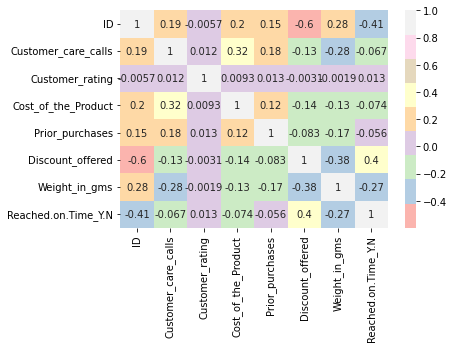

In [33]:
sns.heatmap(e_commerce.corr(),annot=True,cmap='Pastel1')

<AxesSubplot:xlabel='Customer_rating', ylabel='Cost_of_the_Product'>

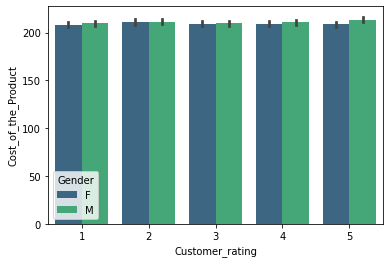

In [34]:
sns.barplot(x='Customer_rating',y='Cost_of_the_Product',palette='viridis',data=e_commerce,hue='Gender')

<AxesSubplot:xlabel='Product_importance', ylabel='Weight_in_gms'>

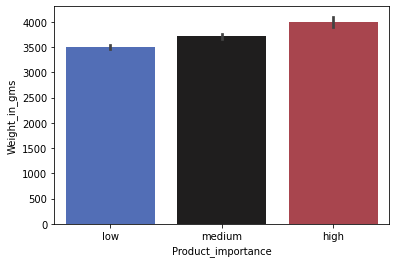

In [35]:
sns.barplot(x='Product_importance',y='Weight_in_gms',palette='icefire',data=e_commerce)

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Reached.on.Time_Y.N'>

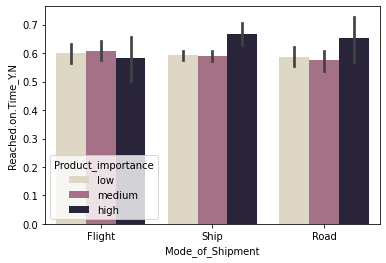

In [36]:
sns.barplot(x='Mode_of_Shipment',y='Reached.on.Time_Y.N',data=e_commerce,hue='Product_importance',palette='ch:s=-.2,r=.6')

<AxesSubplot:xlabel='Gender', ylabel='Cost_of_the_Product'>

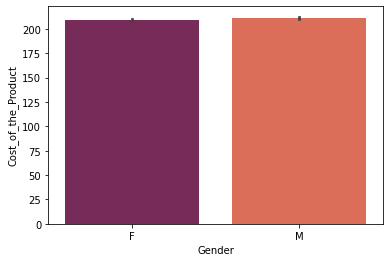

In [37]:
sns.barplot(x='Gender',y='Cost_of_the_Product',data=e_commerce,palette='rocket')

<AxesSubplot:xlabel='Warehouse_block', ylabel='Reached.on.Time_Y.N'>

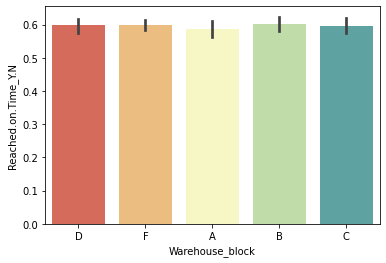

In [38]:
sns.barplot(x='Warehouse_block',y='Reached.on.Time_Y.N',data=e_commerce,palette='Spectral')

<AxesSubplot:xlabel='Warehouse_block', ylabel='Weight_in_gms'>

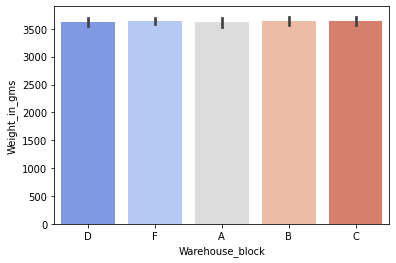

In [39]:
sns.barplot(x='Warehouse_block',y='Weight_in_gms',data=e_commerce,palette='coolwarm')

<AxesSubplot:xlabel='Customer_rating', ylabel='Prior_purchases'>

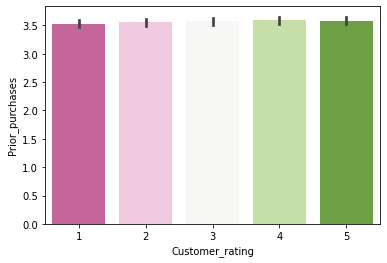

In [40]:
sns.barplot(x='Customer_rating',y='Prior_purchases',data=e_commerce,palette='PiYG')

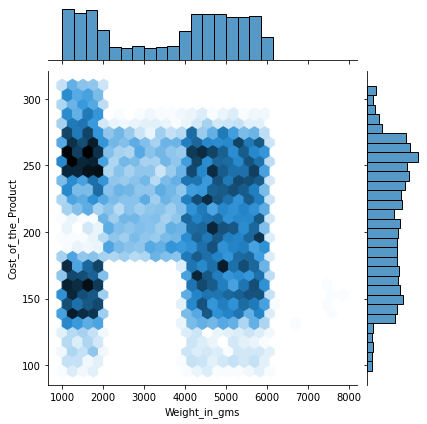

In [41]:
sns.jointplot(x='Weight_in_gms',y='Cost_of_the_Product',data=e_commerce,kind='hex')

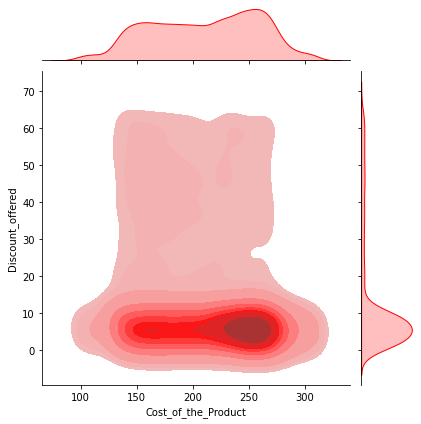

In [42]:
sns.jointplot(x='Cost_of_the_Product',y='Discount_offered',data=e_commerce,kind='kde',color='red',fill=True)

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Cost_of_the_Product'>

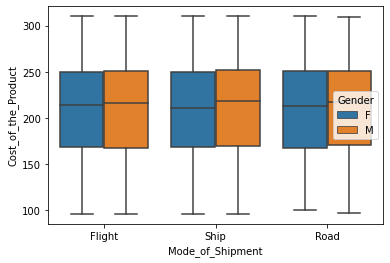

In [43]:
sns.boxplot(x='Mode_of_Shipment',y='Cost_of_the_Product',data=e_commerce,hue='Gender')

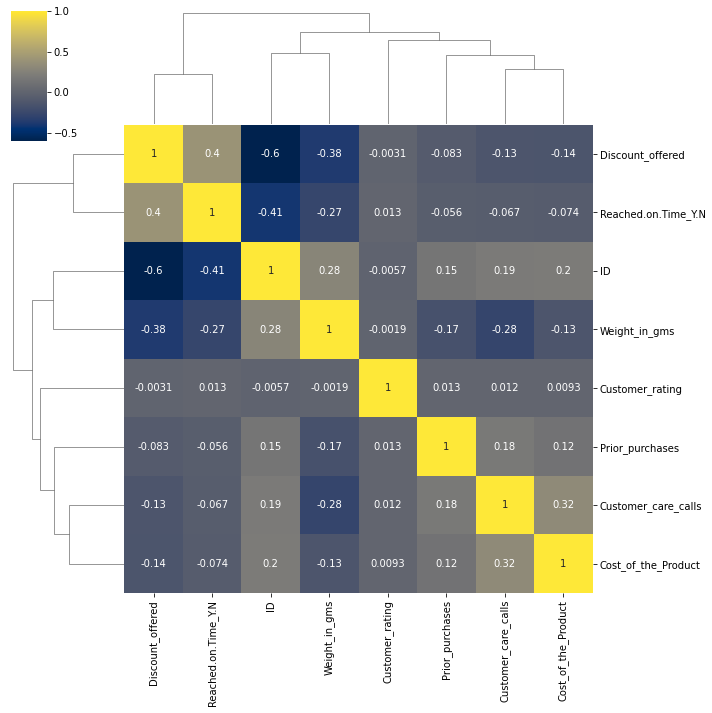

In [44]:
sns.clustermap(e_commerce.corr(),annot=True,cmap='cividis')

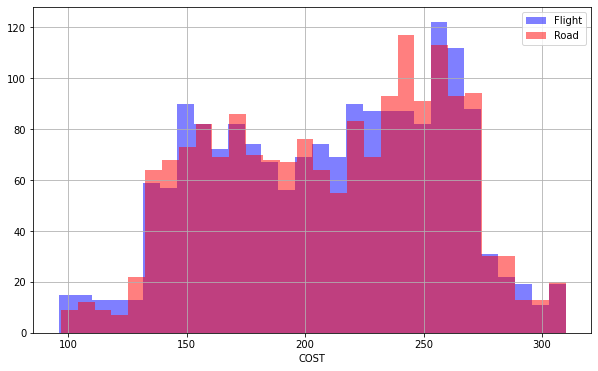

In [45]:
plt.figure(figsize=(10,6))
e_commerce[e_commerce['Mode_of_Shipment']=='Flight']['Cost_of_the_Product'].hist(alpha=0.5,color='blue',bins=30,label='Flight')
e_commerce[e_commerce['Mode_of_Shipment']=='Road']['Cost_of_the_Product'].hist(alpha=0.5,color='red',bins=30,label='Road')
plt.xlabel('COST')
plt.legend()

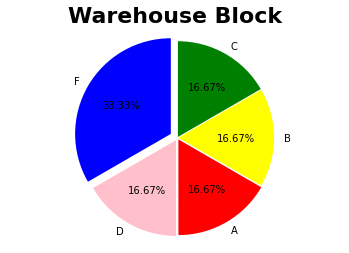

In [46]:
plt.pie(e_commerce.Warehouse_block.value_counts(),explode=[.8,.3,.2,.1,.1],startangle=90,autopct='%.2f%%',labels=['F','D','A','B','C'],radius=10,colors=['blue','pink','red','yellow','green'])
plt.axis('equal')
plt.title('Warehouse Block',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

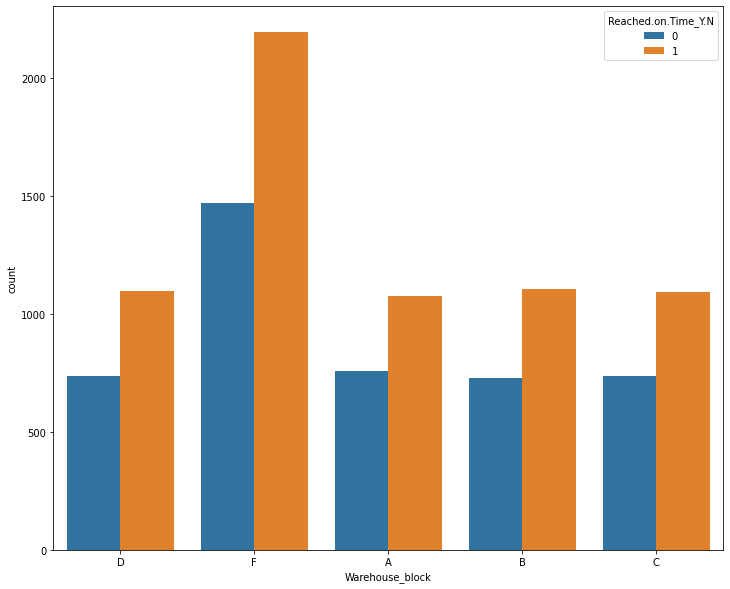

In [47]:
plt.figure(figsize=(12,10))
sns.countplot(e_commerce.Warehouse_block,hue=label)
plt.show()

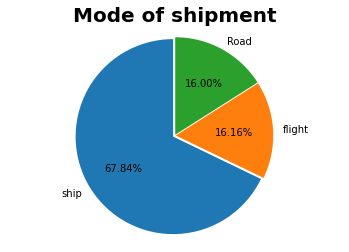

In [48]:
plt.pie(e_commerce.Mode_of_Shipment.value_counts(),explode=[.2,.1,.1],startangle=90,autopct='%.2f%%',labels=['ship','flight','Road'],radius=10,)
plt.axis('equal')
plt.title('Mode of shipment',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

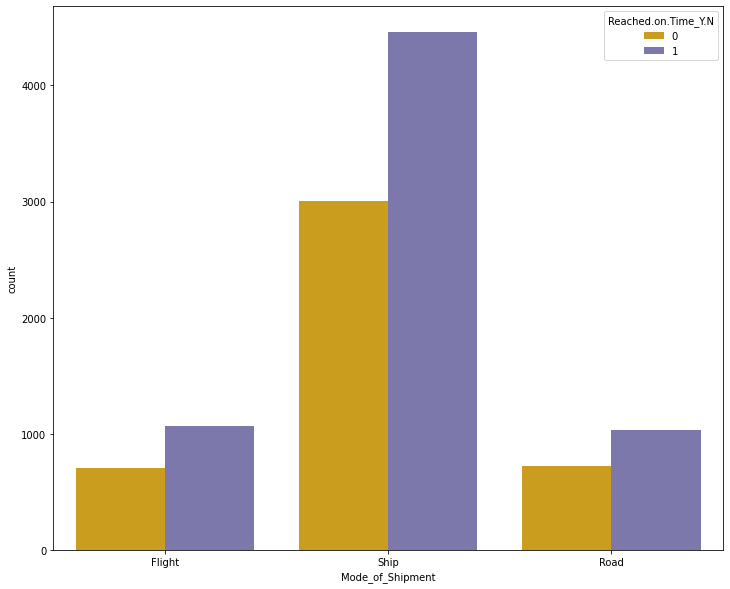

In [49]:
plt.figure(figsize=(12,10))
sns.countplot(e_commerce.Mode_of_Shipment,hue=label,palette='Dark2_r')
plt.show()

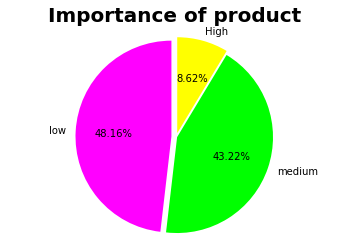

In [50]:
plt.pie(e_commerce.Product_importance.value_counts(),explode=[.5,.1,.4],startangle=90,autopct='%.2f%%',labels=['low','medium','High'],radius=10,colors=['#ff00ff','#00ff00','yellow'])
plt.axis('equal')
plt.title('Importance of product',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

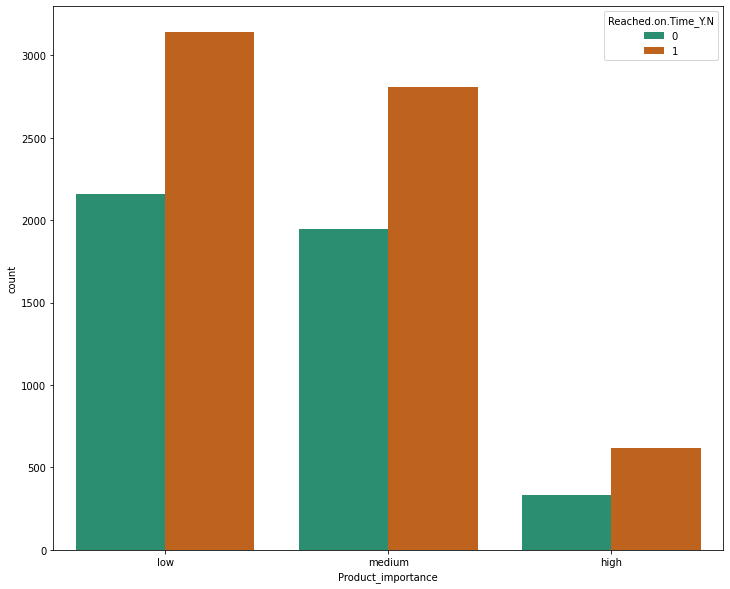

In [51]:
plt.figure(figsize=(12,10))
sns.countplot(e_commerce.Product_importance,hue=label,palette='Dark2')
plt.show()

In [52]:
# e_commerce.Product_importance=pd.Categorical(e_commerce.Product_importance,categories=['low','medium','High'],ordered=True).codes

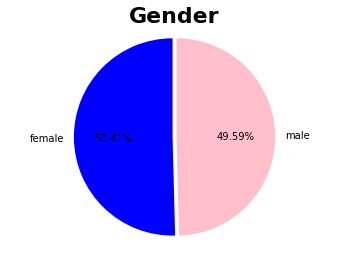

In [53]:
plt.pie(e_commerce.Gender.value_counts(),explode=[.1,.3],startangle=90,autopct='%.2f%%',labels=['female','male'],radius=10,colors=['blue','pink'])
plt.axis('equal')
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

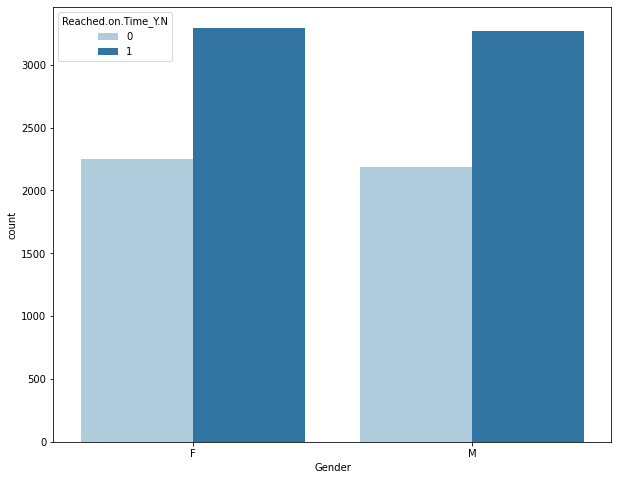

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(e_commerce.Gender,hue=label,palette='Paired')
plt.show()

In [55]:
# e_commerce.Gender=pd.Categorical(e_commerce.Gender,categories=['M','F'],ordered=True).codes

### Preprocessing

ID doesn't seems to have any importance so we could easily drop that columns

In [56]:
e_commerce.drop("ID",inplace=True,axis=1)

In [57]:
e_commerce.rename(columns={"Reached.on.Time_Y.N":"On_Time"},inplace=True)

Maximum values of some important columns

In [58]:
maxCostProduct = e_commerce[e_commerce["Cost_of_the_Product"] == e_commerce["Cost_of_the_Product"].max()]
maxPurchases = e_commerce[e_commerce["Prior_purchases"] == e_commerce["Prior_purchases"].max()]
maxWeight = e_commerce[e_commerce["Weight_in_gms"] == e_commerce["Weight_in_gms"].max()]

Minimum values of some important columns

In [59]:
minCostProduct = e_commerce[e_commerce["Cost_of_the_Product"] == e_commerce["Cost_of_the_Product"].min()]
minPurchases = e_commerce[e_commerce["Prior_purchases"] == e_commerce["Prior_purchases"].min()]
minWeight = e_commerce[e_commerce["Weight_in_gms"] == e_commerce["Weight_in_gms"].min()]

In [60]:
e_commerce.duplicated().sum()

0

In [61]:
e_commerce.isnull().all()

Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
On_Time                False
dtype: bool

In [62]:
e_commerce.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
On_Time                0
dtype: int64

### Normality

In [63]:
#for mathematical analysis, to guarantee even though it is not necessary
df = e_commerce.select_dtypes(include=["float64","int64","int32"])

In [64]:
for i in df.columns:
    print(i)
    print("---"*5)
    print("%.4f - %.4f" % shapiro(e_commerce[i]))
    print("---"*15)

Customer_care_calls
---------------
0.9180 - 0.0000
---------------------------------------------
Customer_rating
---------------
0.8882 - 0.0000
---------------------------------------------
Cost_of_the_Product
---------------
0.9725 - 0.0000
---------------------------------------------
Prior_purchases
---------------
0.8183 - 0.0000
---------------------------------------------
Discount_offered
---------------
0.6889 - 0.0000
---------------------------------------------
Weight_in_gms
---------------
0.8976 - 0.0000
---------------------------------------------
On_Time
---------------
0.6230 - 0.0000
---------------------------------------------


### Feature Engineering

### Label Encoder
##### In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels info the labels into numeric form so as to convert it into the machine-readable form.

In [65]:
encode = LabelEncoder()

In [66]:
objectcolumns = e_commerce.select_dtypes(include=["object"])
print(objectcolumns.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [67]:
for a in objectcolumns:
    e_commerce[a] = encode.fit_transform(e_commerce[a])

In [68]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  On_Time              10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


### OUTLIER

In [69]:
e_commerceForA = e_commerce.copy()

In [70]:
clf = LocalOutlierFactor()

In [71]:
clf.fit_predict(e_commerceForA)

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
score = clf.negative_outlier_factor_

In [73]:
scoreSorted = np.sort(score)

In [74]:
scoreSorted[0:50]

array([-49.23420001, -45.83305039, -44.90793785, -43.80881891,
       -39.87437401, -23.44503825,  -4.7196879 ,  -3.42435176,
        -3.37610349,  -3.20090154,  -3.06223813,  -2.86920018,
        -2.78754054,  -2.74096165,  -2.5840874 ,  -2.53241128,
        -2.51965873,  -2.49954423,  -2.45206587,  -2.22651546,
        -2.19794237,  -2.14941097,  -2.08814005,  -2.07886447,
        -2.05597358,  -2.04131007,  -1.85543019,  -1.81595265,
        -1.79030482,  -1.78492262,  -1.78367328,  -1.78196285,
        -1.74562079,  -1.72837548,  -1.71070166,  -1.70775564,
        -1.69162048,  -1.68935852,  -1.68902088,  -1.68238855,
        -1.67774099,  -1.66262386,  -1.63914729,  -1.63399915,
        -1.63292157,  -1.63241874,  -1.62371866,  -1.62080133,
        -1.61929576,  -1.61737996])

In [75]:
point = scoreSorted[6]
print(point)
print("---"*10)
e_commerceForA[score == point]

-4.7196878981741435
------------------------------


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_Time
251,4,1,2,2,145,3,2,0,5,6102,1


In [76]:
outliers = score < point
e_commerce[outliers]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,On_Time
198,3,2,2,3,142,3,2,0,38,7640,1
199,4,2,2,2,154,3,2,1,38,7846,1
205,4,2,2,3,145,3,2,0,24,7588,1
213,1,2,2,5,160,3,2,0,31,7401,1
245,4,2,2,4,154,3,2,0,48,7684,1
257,4,1,2,2,129,3,2,0,22,6614,1


In [77]:
e_commerce[outliers].index

Int64Index([198, 199, 205, 213, 245, 257], dtype='int64')

#### DELETING

In [78]:
outliersIndexList = [e_commerce[outliers].index]
type(outliersIndexList)

list

In [79]:
for d in outliersIndexList:
    e_commerce.drop(index=d,inplace=True)

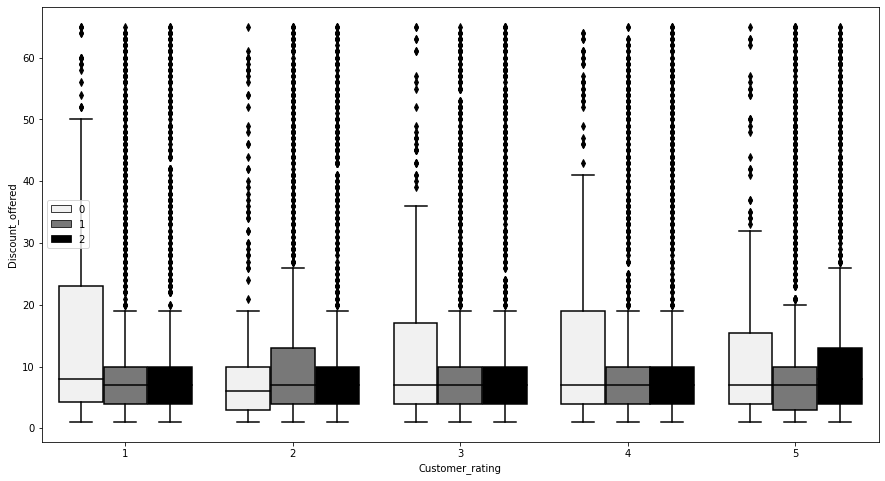

In [80]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="Product_importance",color="black",data=e_commerce)
plt.legend()
plt.show()

we need to make Discount_offered and Customer_rating standardize
### STANDARDIZATION
#### for Customer_rating

In [81]:
print(e_commerce["Customer_rating"].mode())
print(e_commerce["Customer_rating"].max())
print(e_commerce["Customer_rating"].min())
print(e_commerce["Customer_rating"].mean())
print(sms.DescrStatsW(e_commerce["Customer_rating"]).tconfint_mean())

0    3
dtype: int64
5
1
2.990448467206404
(2.9640174157017847, 3.0168795187110233)


In [82]:
def func(x):
    if x < 2.99:
        return "BAD"
    else:
        return "GOOD"

In [83]:
e_commerce["Customer_rating"] = e_commerce["Customer_rating"].apply(lambda x: func(x))

In [84]:
e_commerce["Customer_rating"].value_counts()

GOOD    6595
BAD     4398
Name: Customer_rating, dtype: int64

In [85]:
e_commerce["Customer_rating"] = encode.fit_transform(e_commerce["Customer_rating"])

In [86]:
e_commerce["Customer_rating"].value_counts()

1    6595
0    4398
Name: Customer_rating, dtype: int64

#### for Discount_offered

In [87]:
print(e_commerce["Discount_offered"].mode())
print(e_commerce["Discount_offered"].max())
print(e_commerce["Discount_offered"].min())
print(e_commerce["Discount_offered"].mean())
print(sms.DescrStatsW(e_commerce["Discount_offered"]).tconfint_mean())

0    10
dtype: int64
65
1
13.362230510324752
(13.059329677044607, 13.665131343604896)


In [88]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

In [89]:
e_commerce["Discount_offered"] = e_commerce["Discount_offered"].apply(lambda x: funcforD(x))

In [90]:
e_commerce["Discount_offered"].value_counts()

LESS        8514
NORMAL      1706
TOO MUCH     773
Name: Discount_offered, dtype: int64

In [91]:
e_commerce["Discount_offered"] = encode.fit_transform(e_commerce["Discount_offered"])

In [92]:
e_commerce["Discount_offered"].value_counts()

0    8514
1    1706
2     773
Name: Discount_offered, dtype: int64

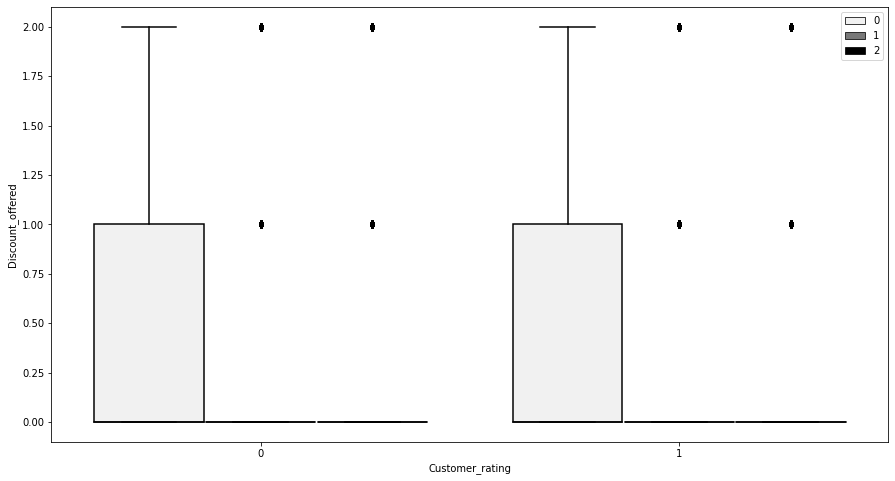

In [93]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="Product_importance",color="black",data=e_commerce)
plt.legend()
plt.show()

In [94]:
e_commerce["Product_importance"].value_counts()

1    5297
2    4748
0     948
Name: Product_importance, dtype: int64

### Train & Test

In [95]:
x = e_commerce.drop(["On_Time"],axis=1)
y = e_commerce["On_Time"]

In [96]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
xTrain.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [98]:
yTrain

5855    1
4714    1
8683    1
298     1
3463    1
       ..
5740    1
5197    0
5396    0
866     1
7276    1
Name: On_Time, Length: 8794, dtype: int64

In [99]:
xTest.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [100]:
yTest

107      1
5484     0
8445     1
10061    0
5665     1
        ..
10548    1
5809     0
7488     1
4632     0
5937     0
Name: On_Time, Length: 2199, dtype: int64

### Classifier Models

In [101]:
x_label = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
y_label = 'On_Time'

#### Decision Tree Classifier

In [102]:
decision_tree = DecisionTreeClassifier()
decisiontree = decision_tree.fit(xTrain, yTrain)
acc_decision_tree = round(decision_tree.score(xTrain, yTrain) * 100, 2)
acc_decision_tree

100.0

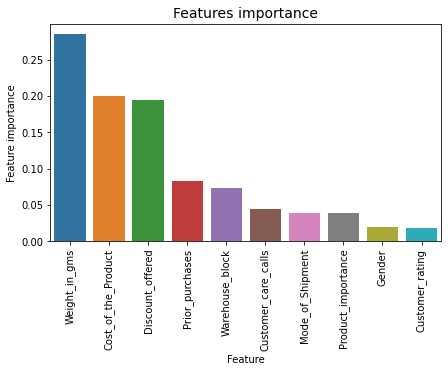

In [103]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': decision_tree.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Random Forest Classifier

In [104]:
random_forest = RandomForestClassifier(n_estimators=100)
randomforest = random_forest.fit(xTrain, yTrain)
acc_random_forest = round(random_forest.score(xTrain, yTrain) * 100, 2)
acc_random_forest

100.0

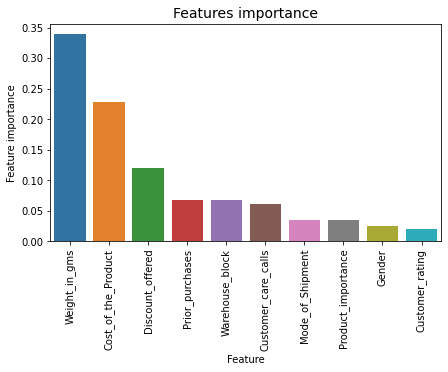

In [105]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': random_forest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Gradient Boosting Classifier

In [106]:
gradientboostingclassifier = GradientBoostingClassifier()
gradboostclass = gradientboostingclassifier.fit(xTrain, yTrain)
acc_gbc = round(gradientboostingclassifier.score(xTrain, yTrain) * 100, 2)
acc_gbc

70.37

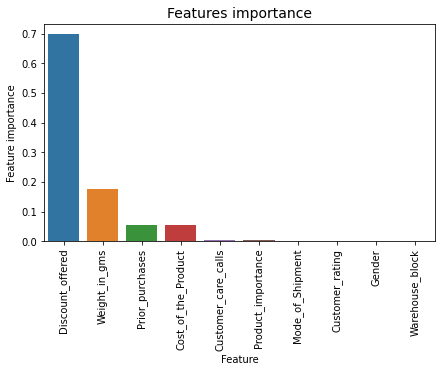

In [107]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': gradientboostingclassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### XgBoost Classifier

In [108]:
xgboostclassifier = XGBClassifier()
xgboostclass = xgboostclassifier.fit(xTrain, yTrain)
acc_xgbc = round(xgboostclassifier.score(xTrain, yTrain) * 100, 2)
acc_xgbc

[11:55:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


88.57

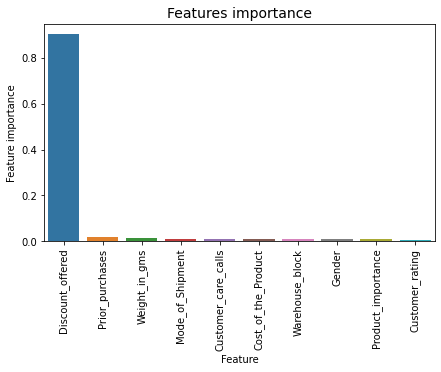

In [109]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': xgboostclassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Cat Boost Classifier

In [110]:
catboostclassifier = CatBoostClassifier(verbose=False).fit(xTrain, yTrain)
catboostclass = catboostclassifier.fit(xTrain, yTrain)
acc_catbc = round(catboostclassifier.score(xTrain, yTrain) * 100, 2)
acc_catbc

81.81

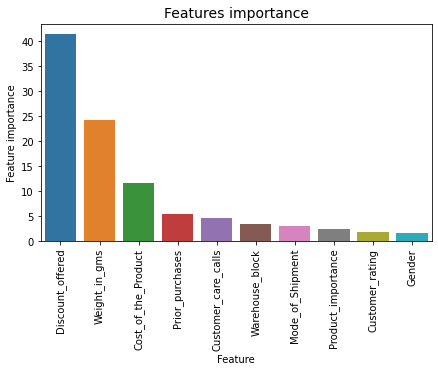

In [111]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': catboostclassifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

#### Light Gradient Boosting Machine Classifier

In [112]:
lightgradientboostmc = LGBMClassifier().fit(xTrain,yTrain)
lightgradboostmc = lightgradientboostmc.fit(xTrain, yTrain)
acc_lgbmc = round(lightgradientboostmc.score(xTrain, yTrain) * 100, 2)
acc_lgbmc

81.15

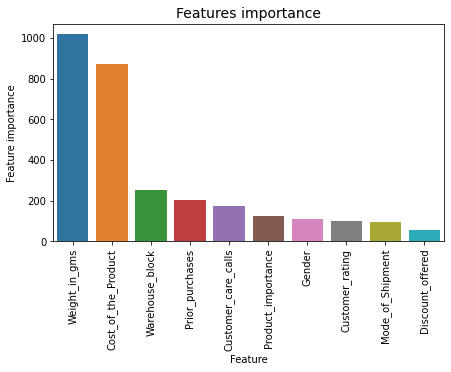

In [113]:
tmp = pd.DataFrame({'Feature': x_label, 'Feature importance': lightgradientboostmc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### Model Evaluation

In [114]:
results = pd.DataFrame({
    'Model': ['Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','XgBoost Classifier','Cat Boost Classifier','Light Gradient Boosting Machine Classifier'],
    'Score': [acc_decision_tree,acc_random_forest,acc_gbc,acc_xgbc,acc_catbc,acc_lgbmc],
    'Model_abb': [decisiontree,randomforest,gradboostclass,xgboostclass,catboostclass,lightgradboostmc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,Model_abb
Score,,
100.00,Decision Tree Classifier,DecisionTreeClassifier()
100.00,Random Forest Classifier,"(DecisionTreeClassifier(max_features='auto', r..."
88.57,XgBoost Classifier,"XGBClassifier(base_score=0.5, booster='gbtree'..."
81.81,Cat Boost Classifier,<catboost.core.CatBoostClassifier object at 0x...
81.15,Light Gradient Boosting Machine Classifier,LGBMClassifier()
70.37,Gradient Boosting Classifier,([DecisionTreeRegressor(criterion='friedman_ms...


In [115]:
print(result_df)

                                             Model  \
Score                                                
100.00                    Decision Tree Classifier   
100.00                    Random Forest Classifier   
88.57                           XgBoost Classifier   
81.81                         Cat Boost Classifier   
81.15   Light Gradient Boosting Machine Classifier   
70.37                 Gradient Boosting Classifier   

                                                Model_abb  
Score                                                      
100.00                           DecisionTreeClassifier()  
100.00  (DecisionTreeClassifier(max_features='auto', r...  
88.57   XGBClassifier(base_score=0.5, booster='gbtree'...  
81.81   <catboost.core.CatBoostClassifier object at 0x...  
81.15                                    LGBMClassifier()  
70.37   ([DecisionTreeRegressor(criterion='friedman_ms...  


In [116]:
best_model = result_df['Model'].iloc[0]
print("---"*25)
print("Best Model:",best_model)

---------------------------------------------------------------------------
Best Model: Decision Tree Classifier
